In [1]:
pip install deap

     |████████████████████████████████| 163kB 8.4MB/s 


In [2]:
#Importamos las librerías y dependencias
import random
import math
import numpy as np
from deap import base
from deap import creator
from deap import tools
from deap import algorithms
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras

In [3]:
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))

Num GPUs Available:  1


In [4]:
# Definición de los datos de entrenamiento
mnist = keras.datasets.mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()
print("X_train shape", X_train.shape)
print("y_train shape", y_train.shape)
print("X_test shape", X_test.shape)
print("y_test shape", y_test.shape)

11493376/11490434 [==============================] - 0s 0us/step
X_train shape (60000, 28, 28)
y_train shape (60000,)
X_test shape (10000, 28, 28)
y_test shape (10000,)


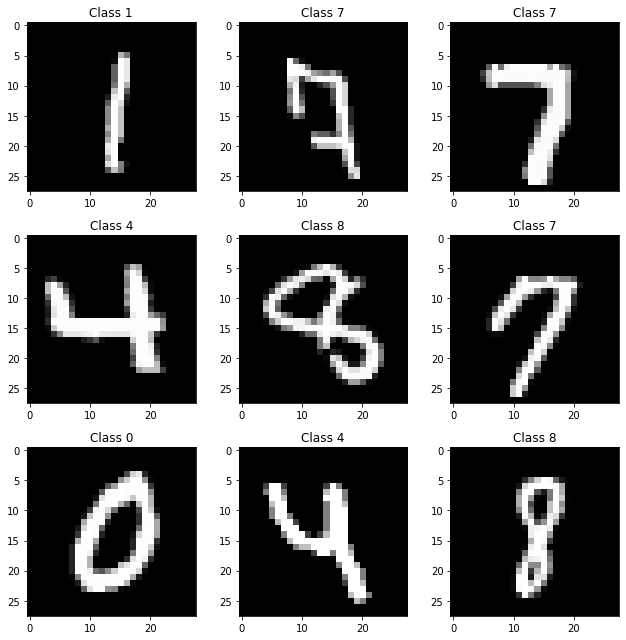

In [5]:
plt.rcParams['figure.figsize'] = (9,9) # Make the figures a bit bigger
for i in range(9):
    plt.subplot(3,3,i+1)
    num = random.randint(0, len(X_train))
    plt.imshow(X_train[num], cmap='gray', interpolation='none')
    plt.title("Class {}".format(y_train[num]))
    
plt.tight_layout()

In [6]:
X_train = X_train.reshape(60000, 784) # reshape 60,000 28 x 28 matrices into 60,000 784-length vectors.
X_test = X_test.reshape(10000, 784)   # reshape 10,000 28 x 28 matrices into 10,000 784-length vectors.
X_train = X_train.astype('float32')   # change integers to 32-bit floating point numbers
X_test = X_test.astype('float32')
X_train /= 255                        # normalize each value for each pixel for the entire vector for each input
X_test /= 255
print("Training matrix shape", X_train.shape)
print("Testing matrix shape", X_test.shape)

Training matrix shape (60000, 784)
Testing matrix shape (10000, 784)


In [7]:
nb_classes = 10 # number of unique digits
Y_train = keras.utils.to_categorical(y_train, nb_classes)
Y_test = keras.utils.to_categorical(y_test, nb_classes)

In [11]:
# se crean los objetos para maximizar o minimizar
#creator.create("FitnessMax", base.Fitness, weights = (1.0,))
#creator.create("Individuo", list, fitness=creator.FitnessMax)

creator.create("FitnessMin", base.Fitness, weights = (-1.0,))
creator.create("individuo", list, fitness=creator.FitnessMin)

/usr/local/lib/python3.7/dist-packages/deap/creator.py:141: RuntimeWarning: A class named 'FitnessMin' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  RuntimeWarning)
/usr/local/lib/python3.7/dist-packages/deap/creator.py:141: RuntimeWarning: A class named 'individuo' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  RuntimeWarning)


In [9]:
#Se define la función objetivo, x tiene 3 posiciones
def funcion_objetivo(x):
  
    for i in range(len(x)):
        if x[i] > 100 or x[i] < 10:
            return 1,
    NC1= round(x[0])
    NC2= round(x[1])    
    NC3= round(x[2])
    modelo=keras.models.Sequential()
    modelo.add(keras.layers.Dense(NC1,input_dim=784,activation='relu'))
    modelo.add(keras.layers.Dense(NC2,activation='relu'))
    modelo.add(keras.layers.Dense(NC3,activation='relu'))    
    modelo.add(keras.layers.Dense(10,activation='softmax')) 
    modelo.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    modelo.fit(X_train, Y_train,
          batch_size=128, epochs=5,
          verbose=0)
    
    score = modelo.evaluate(X_test, Y_test, verbose=0)
    return score[0],

In [13]:
toolbox = base.Toolbox()
# Search range or Gene generation range
toolbox.register("attr_uniform", random.uniform, 10, 100)
# Generación del inviduo, 
# La cantidad de posiciones del individuo determina la cantidad de variables a trabajar
toolbox.register("individuo", tools.initRepeat, creator.individuo, 
                 toolbox.attr_uniform, 3)
# Generación de la población
toolbox.register("poblacion", tools.initRepeat, list, 
                 toolbox.individuo, 10)

In [14]:
# Registro de operaciones genéticas
# Parece que los nombres no se pueden modificar
toolbox.register("evaluate", funcion_objetivo)
#toolbox.register("mate", tools.cxOnePoint)
#toolbox.register("mate", tools.cxUniform,indpb=0.25)
toolbox.register("mate", tools.cxBlend, alpha=0.5)
toolbox.register("mutate", tools.mutGaussian, mu=0, 
                 sigma= 5, indpb=0.1)
toolbox.register("select", tools.selTournament, tournsize=3)

In [15]:
def plot_evolucion(log):
    """
    Representa la evolución del mejor individuo en cada generación
    """
    gen = log.select("gen")
    fit_mins = log.select("min")
    fit_maxs = log.select("max")
    fit_ave = log.select("avg")
    fig, ax1 = plt.subplots()
    ax1.plot(gen, fit_mins, "b")
    ax1.plot(gen, fit_maxs, "r")
    ax1.plot(gen, fit_ave, "--k")
    ax1.fill_between(gen, fit_mins, fit_maxs, 
                     where=fit_maxs >= fit_mins, facecolor='g', alpha = 0.2)
    ax1.set_xlabel("Generacion")
    ax1.set_ylabel("Fitness")
    ax1.set_ylim([-10, 160])
    ax1.legend(["Min", "Max", "Avg"], loc="lower center")
    plt.grid(True)
    plt.savefig("Convergencia.eps", dpi = 300)

gen	nevals	avg     	std      	min      	max    
0  	10    	0.118188	0.0205321	0.0940603	0.15938
1  	7     	0.200471	0.267397 	0.0887012	1      
2  	10    	0.102688	0.0094123	0.087017 	0.117537
3  	10    	0.100083	0.0105937	0.0857143	0.115129
4  	7     	0.0994308	0.00865133	0.0870663	0.112056
5  	10    	0.0995743	0.00875982	0.0908791	0.121398
6  	10    	0.0954443	0.00705425	0.084317 	0.110009
7  	10    	0.10186  	0.00838908	0.0913104	0.117583
8  	9     	0.093809 	0.00355832	0.0875614	0.100083
9  	10    	0.0953555	0.00360504	0.090411 	0.103688


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: MatplotlibDeprecationWarning: The parameter where must have the same size as x in fill_between(). This will become an error in future versions of Matplotlib.
  
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


10 	10    	0.0985705	0.00816925	0.0848764	0.111272
Mejor fitness: 0.084317
Mejor individuo [66.7219243525769, 69.63865543236027, 83.75488993151724]


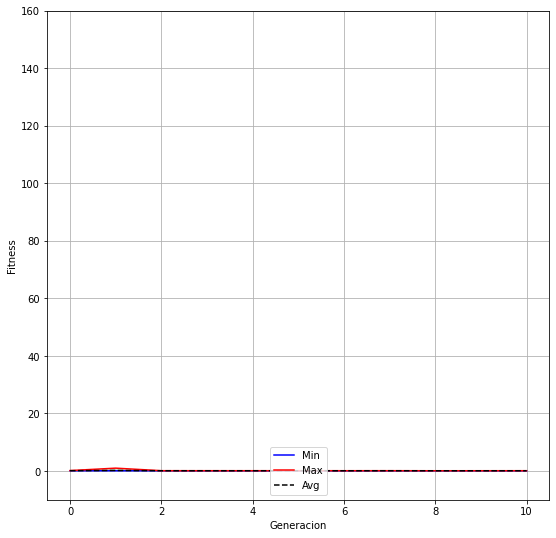

In [17]:
# Función principal
#random.seed(42)
# Configuración de los parámetros del AG
CXPB, MUTPB, NGEN = 0.8, 0.1, 10
pop = toolbox.poblacion() 
hof = tools.HallOfFame(1) 
stats = tools.Statistics(lambda ind: ind.fitness.values) 
stats.register("avg", np.mean)
stats.register("std", np.std)
stats.register("min", np.min)
stats.register("max", np.max)
logbook = tools.Logbook()
pop, logbook = algorithms.eaSimple(pop, toolbox, cxpb=CXPB, 
                                       mutpb=MUTPB, ngen=NGEN, stats=stats, 
                                       halloffame=hof, verbose=True)
#    return hof, logbook 
#best, log = main()
print("Mejor fitness: %f" %hof[0].fitness.values)
print("Mejor individuo %s" %hof[0])
plot_evolucion(logbook)

In [19]:
x=hof[0]

print(x)   
NC1= round(x[0])
NC2= round(x[1])    
NC3= round(x[2])
modelo=keras.models.Sequential()
modelo.add(keras.layers.Dense(NC1,input_dim=784,activation='relu'))
modelo.add(keras.layers.Dense(NC2,activation='relu'))
modelo.add(keras.layers.Dense(NC3,activation='relu'))    
modelo.add(keras.layers.Dense(10,activation='softmax')) 
modelo.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
modelo.fit(X_train, Y_train,
       batch_size=128, epochs=10,
       verbose=0)
    
score = modelo.evaluate(X_test, Y_test, verbose=0)
print(score)


[66.7219243525769, 69.63865543236027, 83.75488993151724]
[0.09435658156871796, 0.9739000201225281]
